<a href="https://www.kaggle.com/code/itsanushkaguptaa/iris-proj-final-1?scriptVersionId=119571476" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#   **Task 1** - ****IRIS FLOWER CLASSIFICATION MODEL****
*(by Anushka Gupta)*

 #  **Steps :-**

1 - Load the data

2 - Analyzing / Manipulating the data

3 - Visualizing the data

4 - Training the model

5 - Evaluating and making predictions.



# **1.**   **Loading The Data**


In [1]:
import numpy as np 
import pandas as pd 

# data viz
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
import os;
os.listdir('/kaggle/input/')

['iriscsv']

In [3]:
iris = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")

# **2.** **Data Analysis**

In [4]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
print(iris.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [6]:
iris.shape

(150, 6)

In [7]:
rows, col = iris.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 6


In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **3. Data Visualization** 

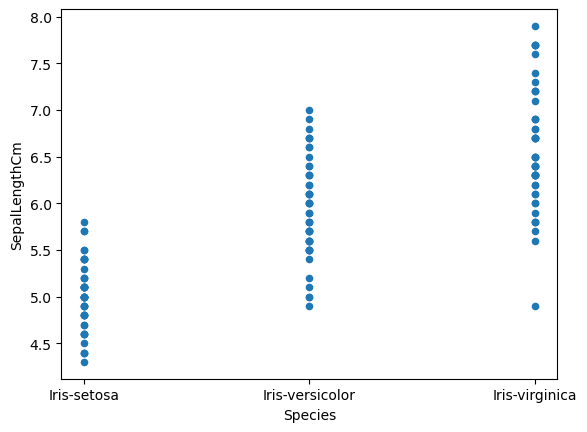

In [11]:
iris.plot(
   x='Species', 
   y='SepalLengthCm', 
   kind='scatter'
)

plt.show()

In [12]:
import plotly.express as px
fig = px.scatter(iris, x="SepalWidthCm", y="SepalLengthCm", color="Species")
fig.show()

In [13]:
import seaborn as sns
sns.set_style("darkgrid")
# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

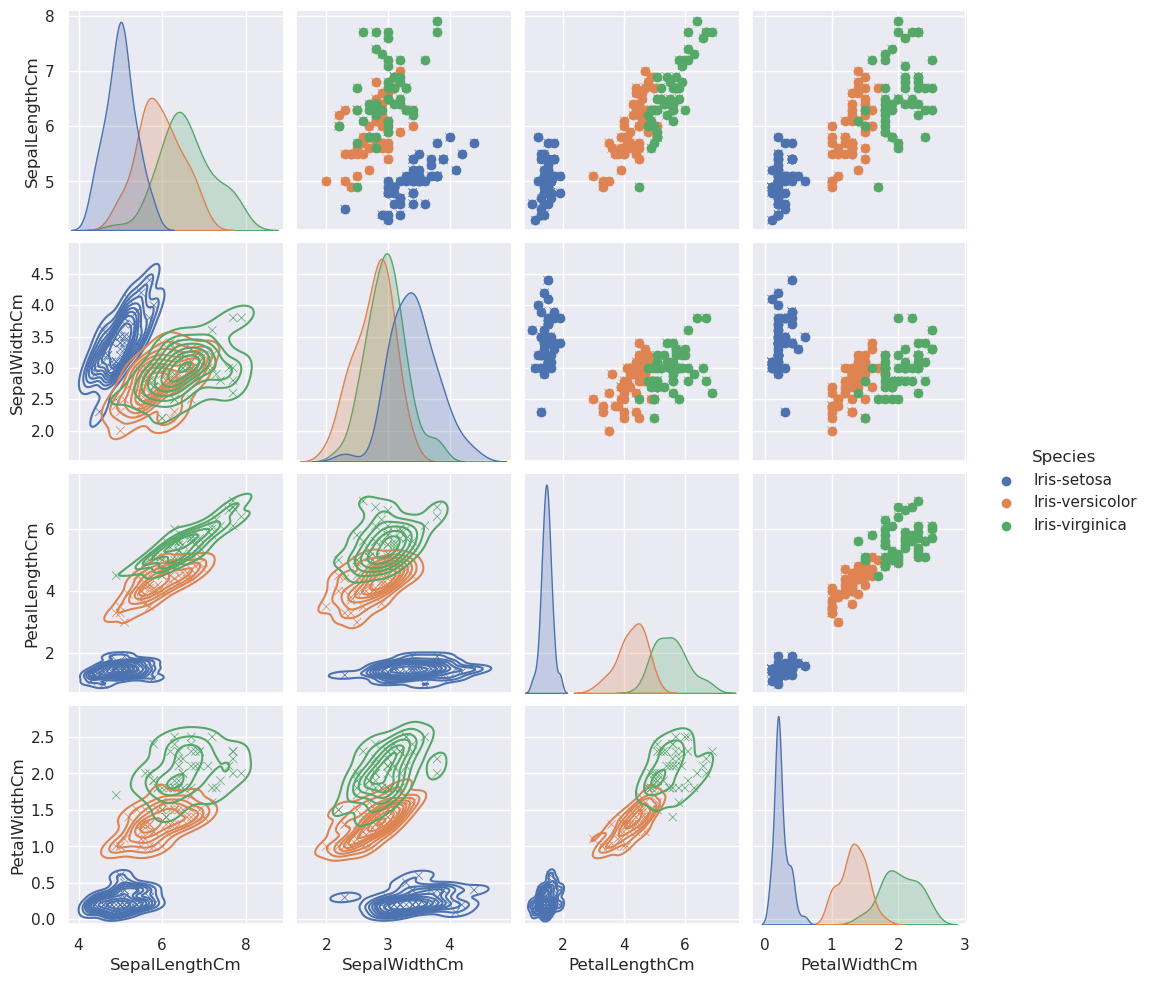

In [14]:
snsdata = iris.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

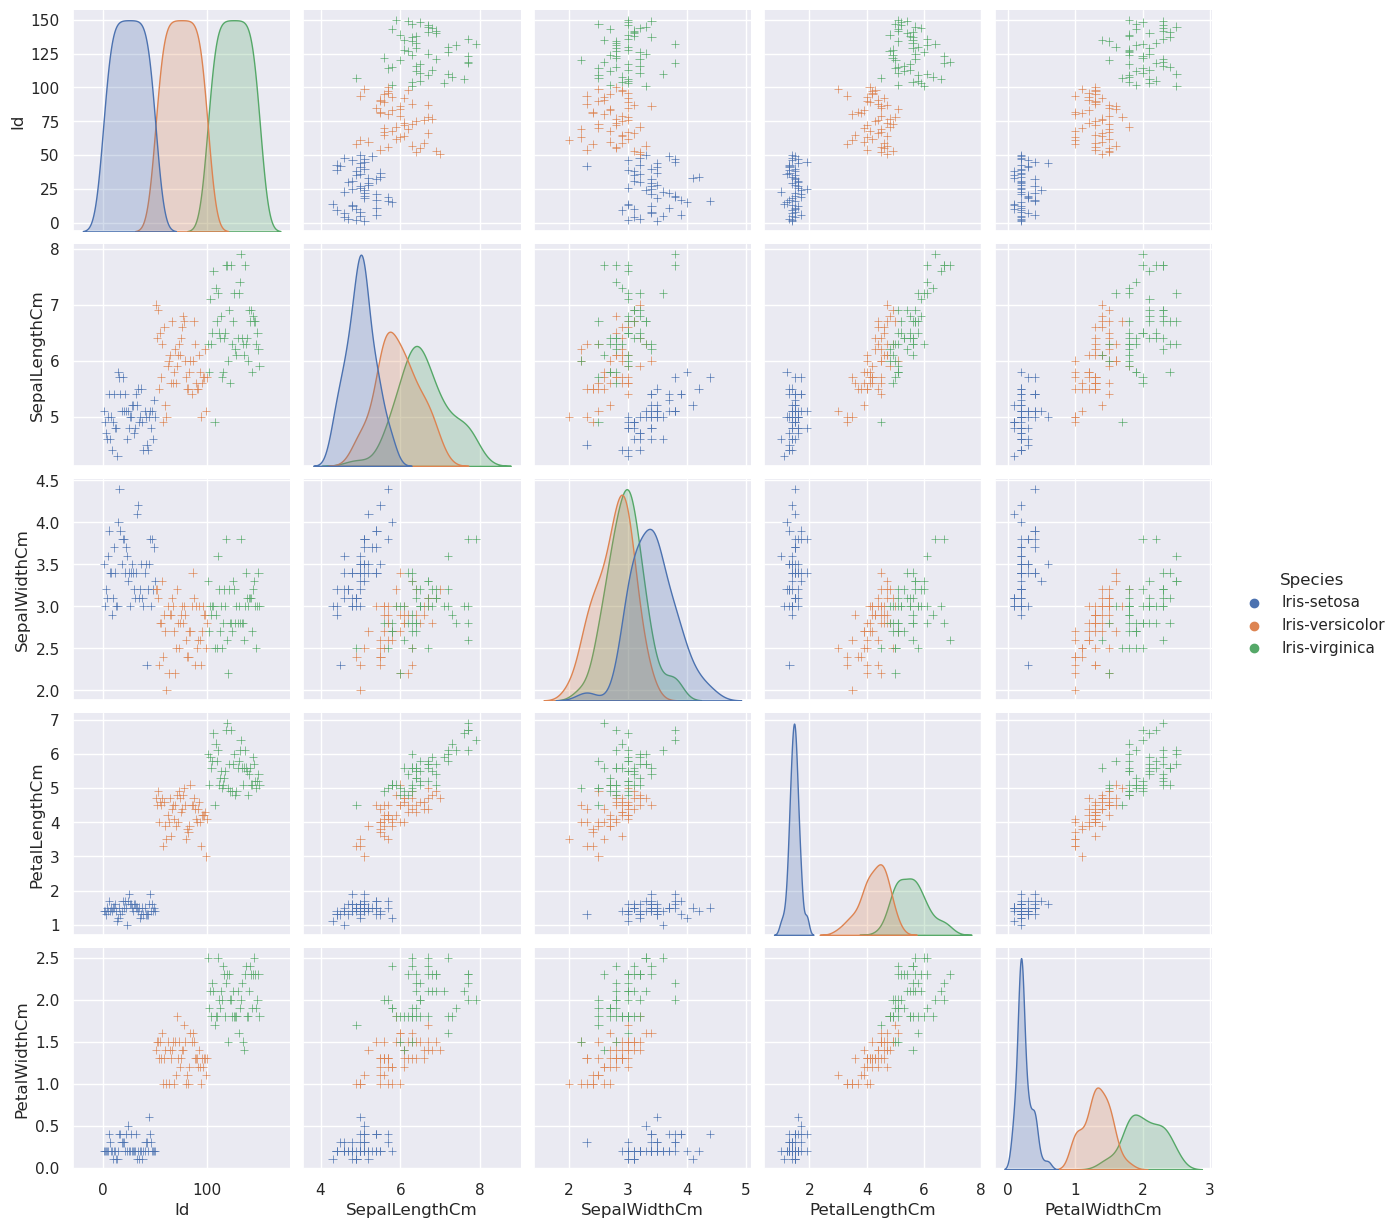

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



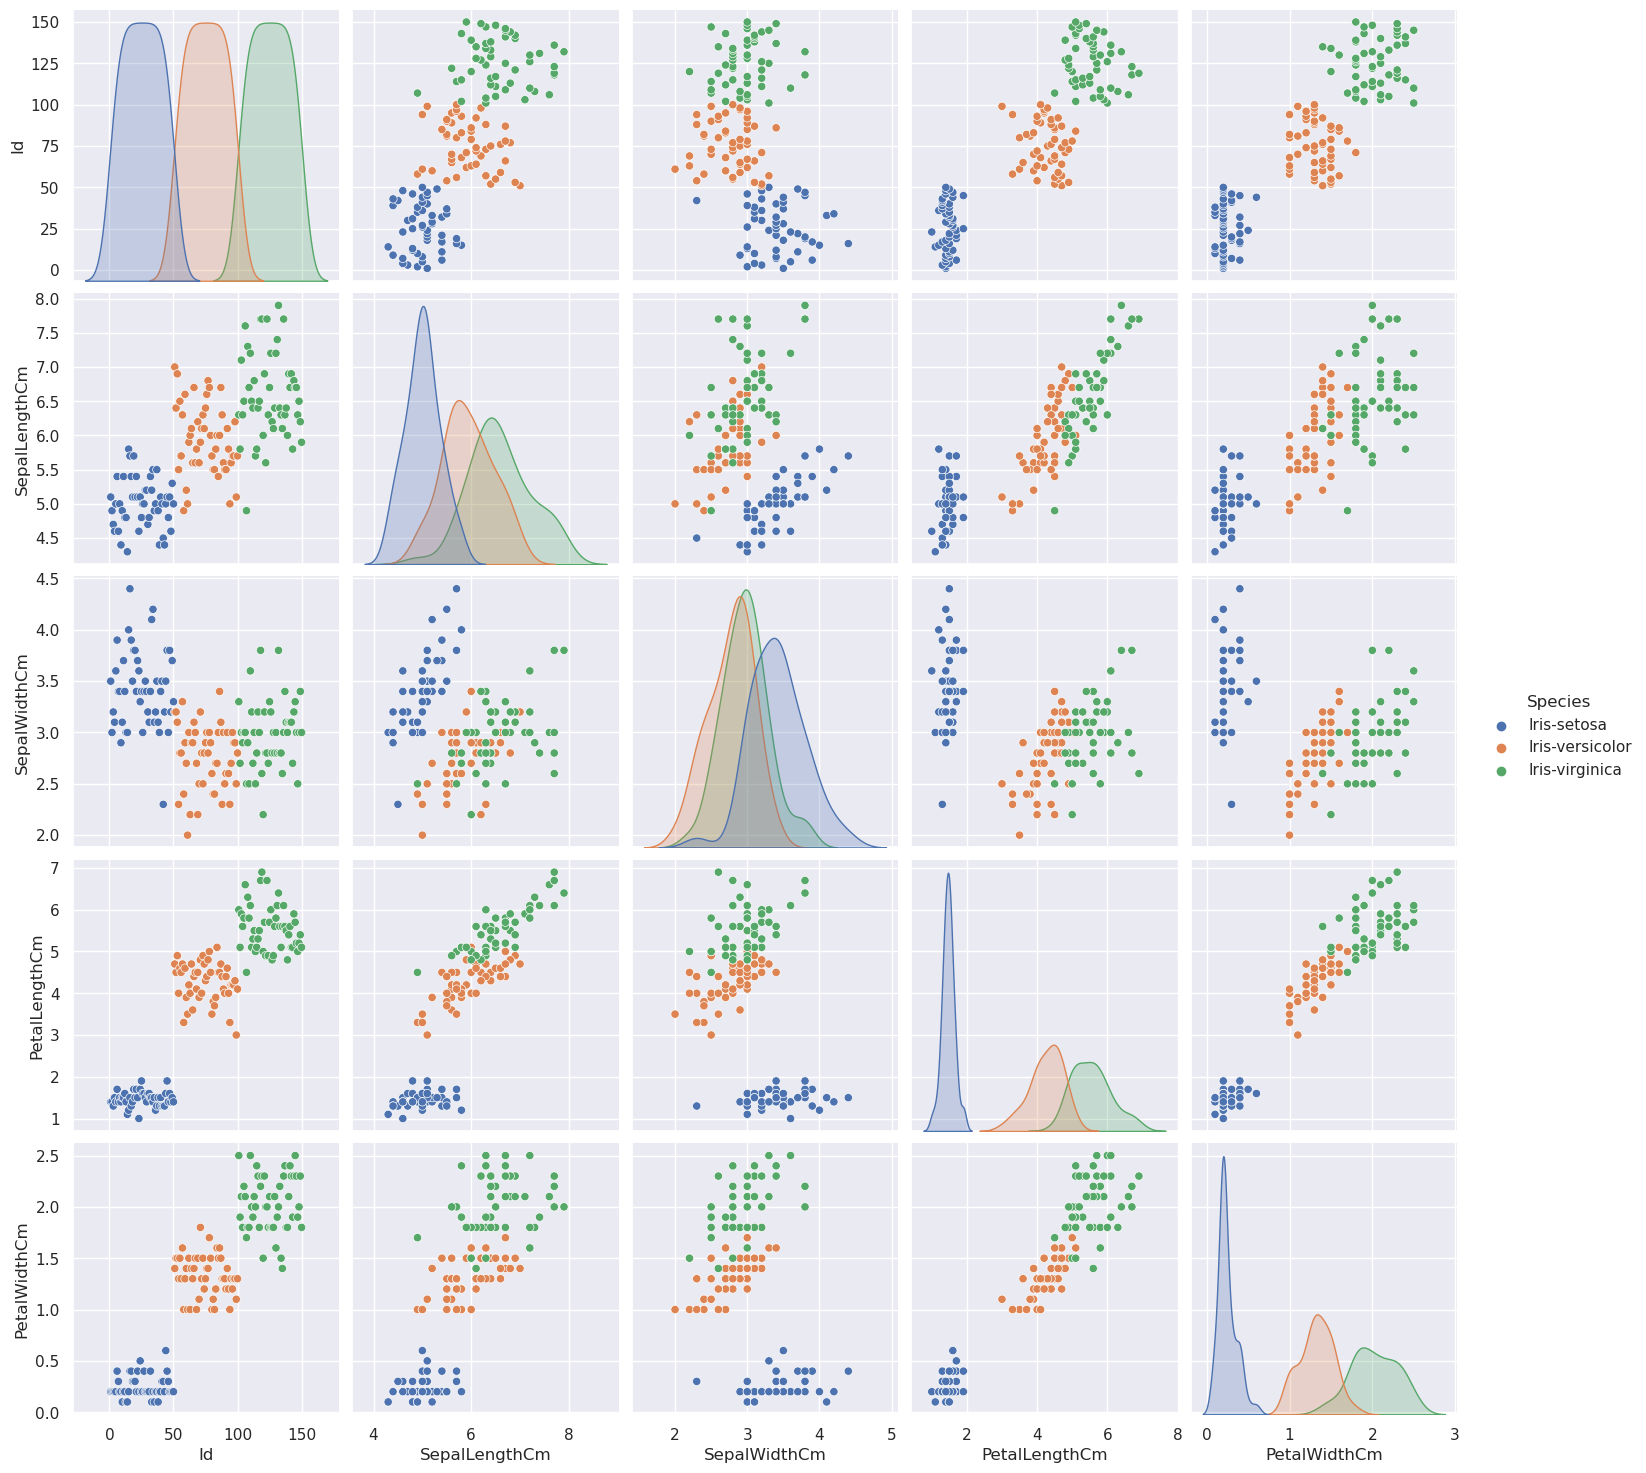

In [16]:
#Another way
sns.pairplot(iris, hue="Species", size = 3)
sns.set()

****Multivariate Linear Regression Model :-****

In [17]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = iris.drop(['Id', 'Species'], axis=1).values # Input Feature Values
y = iris.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [18]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [19]:
iteration = 10000
learning_rate = 0.003 # If you are going by formula, this is actually alpha.
J = np.zeros(iteration) # 1 x 10000 maxtix

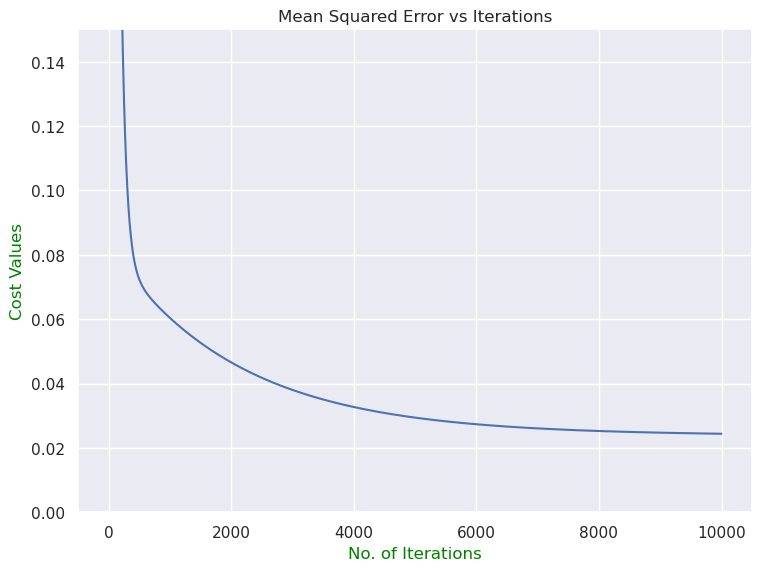

In [20]:
# Let's train our model to compute values of theta
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()


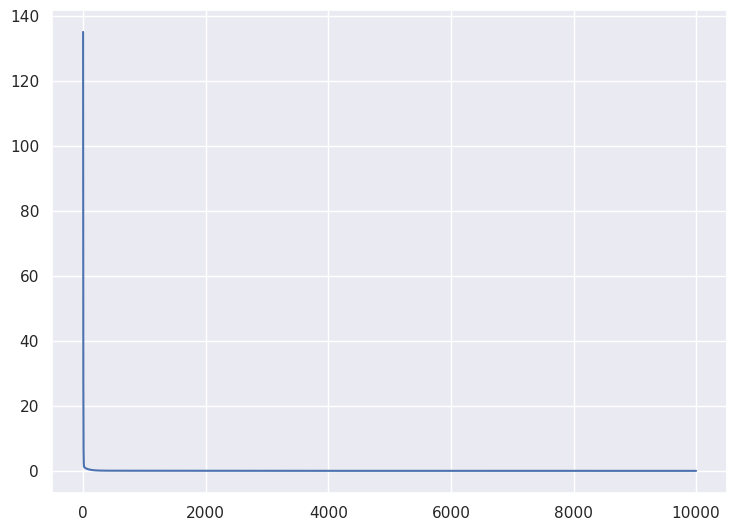

In [21]:
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.show()

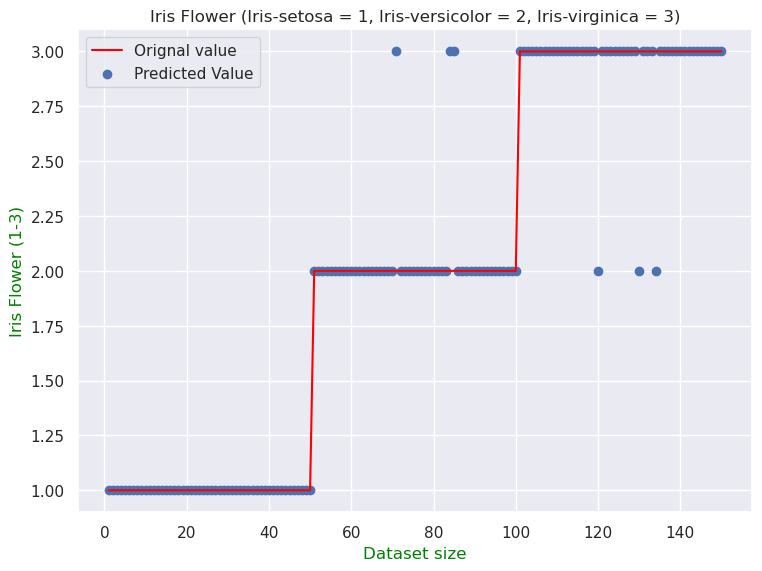

In [22]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()

In [23]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

The model predicted values of Iris dataset with an overall accuracy of 96.0


# **4.**  ****Model Training and Evaluation****

****MODEL TRAINING USING KNN ( k-nearest neighbors algorithm)****

In [24]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The next step is to split the data into training and test sets. Scikit-learn contains a function that shuffles the dataset and splits it into two. The function is known as the train_test_split function:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

Now we can start building the actual machine learning model, namely the K-Nearest Neighbors. This is when we will define the model parameters. The most important parameter of the KNeighbors classifier is the number of neighbors, which we will set to 1:

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

To build the model on the training set, we need to call the fit method of the KNN object:

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# **5. Making Predictions**

In [28]:
x_new = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
print("Predicted target name:", iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [29]:
x_new = np.array([[6, 3, 4, 1]])

In [30]:
prediction = knn.predict(x_new)
print("Prediction:", prediction)
print("Predicted target name:",iris_dataset['target_names'][prediction])

Prediction: [1]
Predicted target name: ['versicolor']


In [31]:
x_new = np.array([[7, 3, 6, 2]])
prediction = knn.predict(x_new)
print("Prediction:", prediction)
print("Predicted target name:",iris_dataset['target_names'][prediction])

Prediction: [2]
Predicted target name: ['virginica']


****The Iris Classification Model is ready!!****